## Audible test take 2
#### 2/28/2017
--Aaron Dharna

##### Successfully read in the file and dropped the customer_id since it corresponded to the indicies of the DF

In [89]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

Rec_data = pd.read_table('recs.txt', sep='\t', header=0)
Rec_data.drop('customer_id', axis=1, inplace='true')

Bought_data = pd.read_table('test.txt', sep='\t', header=0)

##### Getting limits of the DF

In [90]:
#get the number of customers and the number of books being recommended 

Rec_rowNum = Rec_data.shape[0]
Rec_colNum = Rec_data.shape[1]

#print Rec_rowNum, Rec_colNum

#get the number of people who bought books
Bought_rowNum = Bought_data.shape[0]
Bought_colNum = Bought_data.shape[1]

#print Bought_rowNum, Bought_colNum

##### Helper fn

In [91]:
def determine_if_repeats(PeopleWhoBoughtRecs, Num_cust_bought_at_least_1):
    '''@param: PeopleWhoBoughtRecs -- list of people who bought recs
       @param: Counter for people who have bought at least one book
       
       return: the number of customers who bought at least one book from the recommendations list
    
    '''
    
    #remove the person who just got tagged.
    current = PeopleWhoBoughtRecs.pop()
    
    #if the current person is already part of the list of people who have bought recs
    if current in PeopleWhoBoughtRecs:
        #return
        return Num_cust_bought_at_least_1
    
    #else put that person back in the list and increment the counter by 1
    else:
        PeopleWhoBoughtRecs.append(current)
        Num_cust_bought_at_least_1 += 1
        return Num_cust_bought_at_least_1

##### Function for Searching the DF

In [92]:
def DF_Search(Bought_data, Rec_data, Bought_rowNum, Num_cust_bought_at_least_1, Num_bought_recs, num_given_recs, num_purchases, PeopleWhoBoughtRecs, limit):
    ''' 
    @param: Bought_data -- the Dataframe which contains the list of books that customers bought
    @param: Rec_data -- the Dataframe which contains the recommendations list for each customer
    @param: Bought_rowNum -- the number of customers who bought a book
    @param: num_cust_bought_at_least_1 -- # of customers who bought at least one book from the rec list
    @param: Num_bought_recs -- the number of recommended books that are bought 
    @param: num_given_recs -- the number of given recommendations
    @param: num_purchases -- the number of purchases that were made
    @param: PeopleWhoBoughtBooks -- a list (set) of all the people's ID's who bought a recommended book
    @param: limit -- an integer which limits the search to that many recommended books at a time
    
    '''
    
    #for every person who has bought a book 
    for indexs in range(Bought_rowNum):
        
        #increase the number of books bought by 1
        num_purchases += 1
        
        #Get that person's: ID, bought book ID, and list of recommended books 
        ID = Bought_data.loc[[indexs]]['customer_id'].values
        bought = Bought_data.loc[[indexs]]['product_id'].values
        recs = Rec_data.loc[[ID[0]]].values
    
        
        #for the list of recommended books
        for values in recs:
            
            #increase the number of recommended books by the limiting factor
            num_given_recs += limit
            
            #for each book in the list
            for books in range(len(values)):
                
                #if we pass beyond the limit for each person, start on the next person
                if books > limit:
                    break
                    
                #if the book that the person bought exists in the list of recommended books    
                if bought == values[books]:
                    
                    #increment up the bought_rec counter
                    Num_bought_recs += 1
                    #print ID[0], "horray"
                    
                    #save the person's ID
                    PeopleWhoBoughtRecs.append(ID[0])
                    
                    #determine if the person has already bought a book from the reccomendations list
                    Num_cust_bought_at_least_1 = determine_if_repeats(PeopleWhoBoughtRecs, Num_cust_bought_at_least_1)
      
    #return all the counters
    return Num_cust_bought_at_least_1, Num_bought_recs, num_given_recs, num_purchases

##### Running the search with the changing limit

In [9]:
print "Recs_given,\t M1,\t M2,\t M3"

#contains to save the values for each metric
metric1_container = []
metric2_container = []
metric3_container = []

#for every number between 0 and the user-set (in this case the number of recommendations + 1) limit
for i in range(1, (Rec_colNum + 1)):
    
    #initialize stats
    Num_cust_bought_at_least_1 = 0
    Num_bought_recs = 0
    num_given_recs = 0
    num_purchases = 0
    PeopleWhoBoughtRecs = []
    
    #get stats
    Num_cust_bought_at_least_1, Num_bought_recs, num_given_recs, num_purchases = DF_Search(Bought_data, Rec_data, Bought_rowNum, Num_cust_bought_at_least_1, Num_bought_recs, num_given_recs, num_purchases, PeopleWhoBoughtRecs, i)
    
    
    #print Num_cust_bought_at_least_1, Num_bought_recs, num_given_recs, num_purchases, len(PeopleWhoBoughtRecs)
    
    #calculate: % of cust who bought at least one rec, precision, and recall for a given limit
    Metric1 = float(Num_cust_bought_at_least_1)/float(Rec_rowNum)
    Metric2 = float(Num_bought_recs) / float(num_given_recs)
    Metric3 = float(Num_bought_recs) / float(num_purchases)
    
    #save each stat
    metric1_container.append(Metric1)
    metric2_container.append(Metric2)
    metric3_container.append(Metric3)
    
    print i, '\t', Metric1, '\t ', Metric2, '\t', Metric3
    
    
print "Done searching the DF"

Recs_given,	 M1,	 M2,	 M3
1 	0.033965 	0.0226497207523 	0.0226497207523
2 	0.05125 	0.0170880929848 	0.0341761859696
3 	0.068025 	0.0151209184739 	0.0453627554217
4 	0.08547 	0.0142522959626 	0.0570091838503
5 	0.10293 	0.0137317889181 	0.0686589445903
6 	0.119575 	0.0132959225837 	0.0797755355024
7 	0.13677 	0.0130383825151 	0.0912686776055
8 	0.15352 	0.0128077389601 	0.10246191168
9 	0.17036 	0.012635384408 	0.113718459672
10 	0.17036 	0.0113718459672 	0.113718459672
Done searching the DF


##### Displaying stats

In [93]:
print metric1_container
print
print metric2_container 
print
print metric3_container

[0.033965, 0.05125, 0.068025, 0.08547, 0.10293, 0.119575, 0.13677, 0.15352, 0.17036, 0.17036]

[0.022649720752302628, 0.01708809298481799, 0.01512091847389023, 0.014252295962571477, 0.013731788918065127, 0.013295922583740986, 0.013038382515076328, 0.01280773896005225, 0.012635384408040793, 0.011371845967236715]

[0.022649720752302628, 0.03417618596963598, 0.04536275542167069, 0.05700918385028591, 0.06865894459032564, 0.07977553550244591, 0.09126867760553431, 0.102461911680418, 0.11371845967236714, 0.11371845967236714]


##### Visualizing each metric

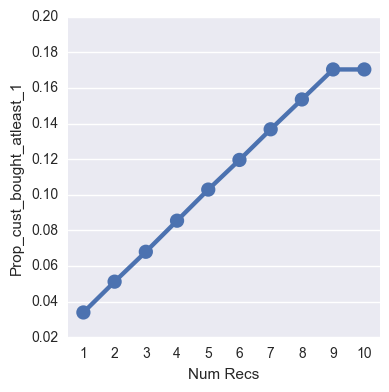

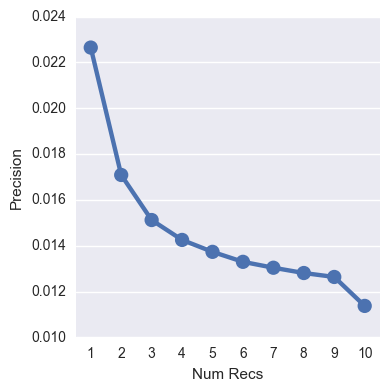

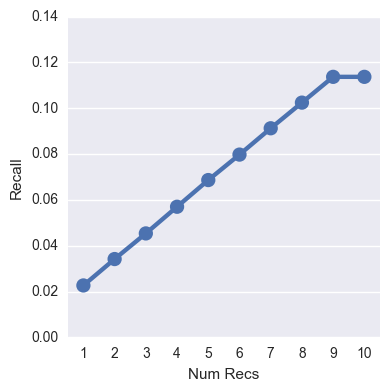

In [94]:

x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
# pdMetric1 = pd.DataFrame(np.array(metric1_container), columns = ['Prop_cust_bought_atleast_1'])
# pdMetric2 = pd.DataFrame(np.array(metric2_container), columns = ['Precision'])
# pdMetric3 = pd.DataFrame(np.array(metric3_container), columns = ['Recall'])


tempData = {'Num Recs': x, 
            'Prop_cust_bought_atleast_1': np.array(metric1_container), 
            'Precision': np.array(metric2_container), 
            'Recall': np.array(metric3_container)
           }

FinalDF = pd.DataFrame(data=tempData)

sb.factorplot(x="Num Recs", y='Prop_cust_bought_atleast_1', data = FinalDF)
sb.factorplot(x="Num Recs", y='Precision', data = FinalDF)
sb.factorplot(x="Num Recs", y='Recall', data = FinalDF)

##### Plotting simple linear regressions for each metric

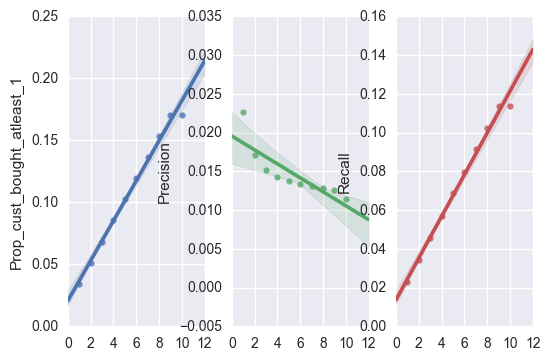

In [95]:
fig, axs = plt.subplots(ncols=3)
sb.regplot(x = x, y = 'Prop_cust_bought_atleast_1', data=FinalDF, ax=axs[0])
sb.regplot(x = x, y = 'Precision', data=FinalDF, ax=axs[1])
sb.regplot(x = x, y = 'Recall', data=FinalDF, ax=axs[2])